# Descripcion del proyecto

Los clientes de Beta Bank se están yendo cada mes poco a poco.
Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.
Necesitamos predecir si un cliente dejará el banco pronto. Contamos con los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.
Crearemos un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitamos un valor F1 de al menos 0.59. Verificaremos el valor F1 para el conjunto de prueba. 
Además mediremos la métrica AUC-ROC y compararla con el valor F1.

# Descripcion de los datos

Puedes encontrar los datos en el archivo  /datasets/Churn.csv 


 **Características**


- `RowNumber`: índice de cadena de datos
- `CustomerId`: identificador de cliente único
- `Surname`: apellido
- `CreditScore`: valor de crédito
- `Geography`: país de residencia
- `Gender`: sexo
- `Age`: edad
- `Tenure`: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- `Balance`: saldo de la cuenta
- `NumOfProducts`: número de productos bancarios utilizados por el cliente
- `HasCrCard`: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- `IsActiveMember`: actividad del cliente (1 - sí; 0 - no)
- `EstimatedSalary`: salario estimado


 **Objetivo**


- `Exited`: El cliente se ha ido (1 - sí; 0 - no)

# Importamos librerias  y cargamos datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/Churn.csv')

# Exploramos el dataset y lo preprocesamos

In [3]:
data.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [177]:
data['Tenure'].isna().sum() * 100 / data.shape[0]

9.09

## Conclusión a la exploración de datos

Podemos observar una tabla con 14 columnas y 10,000 filas y solo una columna con valores ausentes con un valor del %9 de los datos, sin valores duplicados, y los tipos de datos correctos 

# Preprocesamiento de datos

In [178]:
data['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

Podemos cambiar los valores ausentes por la mediana de los valores en la columna de `Tenure`

In [11]:
mediana = data['Tenure'].median()
mediana

5.0

In [12]:
data['Tenure'].fillna(mediana, inplace=True)

In [14]:
data['Tenure'].isna().sum()

0

## Eliminacion de caracteristicas

Vamos a eliminar 3 columnas en nuestro dataframe que no nos aportan informacion para evitar que nuestro modelo nos haga malas predicciones

In [15]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [16]:
data.shape[1]

11

nos quedamos con los datos esenciales SOLO 11 COLUMNAS 

## Vamos a convertir variables categoricas en numericas

In [184]:
data_one = pd.get_dummies(data, drop_first=True)
data_one.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0


In [185]:
data_one.shape

(10000, 12)

Listo ya quedaron los datos limpios ahora nos enfocaremos en predecir si unn cliente dejara el banco pronto...

# Machine learning

## **Vamos a hacer una investigacion sobre el balanceo de nuestra clase a predecir**

In [187]:
# Calcula el recuento de valores únicos en la columna 'Exited'
exited_counts = data_one['Exited'].value_counts()
exited_counts

0    7963
1    2037
Name: Exited, dtype: int64

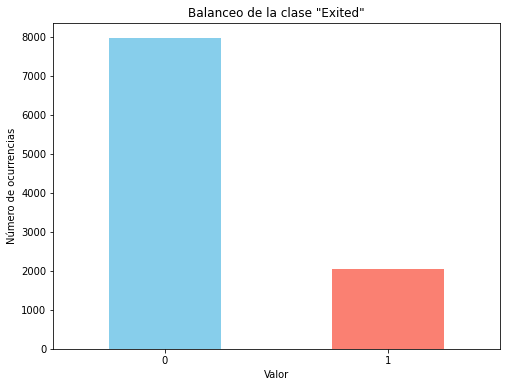

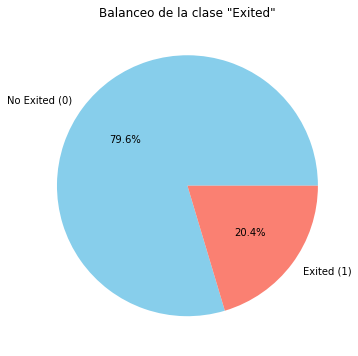

In [188]:
# Crea un gráfico de barras
plt.figure(figsize=(8, 6))
exited_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Balanceo de la clase "Exited"')
plt.xlabel('Valor')
plt.ylabel('Número de ocurrencias')
plt.xticks(rotation=0)
plt.show()

# Crea un gráfico de pastel
plt.figure(figsize=(6, 6))
exited_counts.plot(kind='pie', labels=['No Exited (0)', 'Exited (1)'], autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Balanceo de la clase "Exited"')
plt.ylabel('')
plt.show()

contamos con 7963 clientes que no se han ido versus 2037 clientes que si se han ido. la clase se encuentra desbalanceada!!

## Entrenamiento de  modelos sin tener en cuenta el desequilibrio de clases

observaremos los resultados para ver que ocurre si no realizaramos un balanceo de nuestra clase a predecir

### Separar caracteristicas y objetivos

In [189]:
target = data_one['Exited']
features = data_one.drop('Exited', axis=1)

### Dividir datos en conjunto de (entrenamiento validación y prueba)

In [190]:
# Dividir los datos en entrenamiento (60%), validación (20%) y prueba (20%)
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

In [191]:
# Imprimir tamaños de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", len(features_train))
print("Tamaño del conjunto de validación:", len(features_valid))
print("Tamaño del conjunto de prueba:", len(features_test))

Tamaño del conjunto de entrenamiento: 6000
Tamaño del conjunto de validación: 2000
Tamaño del conjunto de prueba: 2000


### Escalado de datos

In [192]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)

###  Creación de modelos y entrenamiento de modelos

In [197]:
# Crear instancias de los modelos
model_lr = LogisticRegression(random_state=12345)
model_dt = DecisionTreeClassifier(random_state=12345)
model_rf = RandomForestClassifier(random_state=12345)


In [198]:
# Crear un diccionario que contenga los modelos y sus respectivos grids de hiperparámetros
models_params = {'Logistic Regression': (model_lr, param_grid_lr),
                 'Decision Tree': (model_dt, param_grid_dt),
                 'Random Forest': (model_rf, param_grid_rf)}


In [199]:
# Iterar sobre los modelos y sus grids de hiperparámetros
best_models = {}
for model_name, (model, param_grid) in models_params.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(features_train, target_train)
    best_models[model_name] = grid_search.best_estimator_


In [200]:
# Imprimir los mejores hiperparámetros encontrados para cada modelo
for model_name, best_model in best_models.items():
    print(f"Mejores hiperparámetros para {model_name}: {best_model.get_params()}")


Mejores hiperparámetros para Logistic Regression: {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 12345, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Mejores hiperparámetros para Decision Tree: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 12345, 'splitter': 'best'}
Mejores hiperparámetros para Random Forest: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_

In [201]:
# Entrenar los modelos con los mejores hiperparámetros
for model_name, best_model in best_models.items():
    best_model.fit(features_train, target_train)

###  Accuracy en nuestros Modelos

In [202]:
# Crear una lista para almacenar las métricas de exactitud de cada modelo
accuracy_scores = []

# Calcular la precisión de cada modelo en el conjunto de validación
for model_name, best_model in best_models.items():
    # Predecir las etiquetas utilizando el modelo
    predicted_labels = best_model.predict(features_valid)
    # Calcular la precisión y añadirla a la lista
    accuracy = accuracy_score(target_valid, predicted_labels)
    accuracy_scores.append((model_name, accuracy))

# Imprimir las métricas de exactitud de cada modelo
for model_name, accuracy in accuracy_scores:
    print(f"Precisión de {model_name}: {accuracy:.4f}")

Precisión de Logistic Regression: 0.8040
Precisión de Decision Tree: 0.8505
Precisión de Random Forest: 0.8640


**Observaciones:** Aquí aplicamos la precisión en nuestros modelos, sin embargo podríamos mejorarlo si tuviesemos en cuenta la métrica F1 en vez de el Accuracy, dado que estamos viendo un problema desbalanceado el F1 nos diría con mayor certeza que tan bien predice sobre el target que realmente nos importa el verdadero positivo.

###  Metrica f1

In [203]:
# Crear una lista para almacenar las métricas F1 de cada modelo
f1_scores = []

# Calcular el F1-score de cada modelo en el conjunto de validación
for model_name, best_model in best_models.items():
    # Predecir las etiquetas utilizando el modelo
    predicted_labels = best_model.predict(features_valid)
    # Calcular el F1-score y añadirlo a la lista
    f1 = f1_score(target_valid, predicted_labels)
    f1_scores.append((model_name, f1))

# Imprimir las métricas F1 de cada modelo
for model_name, f1 in f1_scores:
    print(f"F1-score de {model_name}: {f1:.4f}")

F1-score de Logistic Regression: 0.2741
F1-score de Decision Tree: 0.5321
F1-score de Random Forest: 0.5928


Aquí podemos observar un muy bajo rendimiento del modelo, esto puede deberse a los diferentes errores que hemos visto arriba, trataremos de corregirlos. De esa forma quizas consigamos elevar el valor del F1.

## Mejora de los modelos (corrigiendo el desequilibrio)

**sobremuestreo**

In [210]:
def upsample(features, target, repeat):
    features_zeros = pd.DataFrame(features[target == 0])
    features_ones = pd.DataFrame(features[target == 1])
    target_zeros = pd.Series(target[target == 0])
    target_ones = pd.Series(target[target == 1])

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

**submuestreo**

In [211]:
def downsample(features, target, fraction):
    features_zeros = pd.DataFrame(features[target == 0])
    features_ones = pd.DataFrame(features[target == 1])
    target_zeros = pd.Series(target[target == 0])
    target_ones = pd.Series(target[target == 1])

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

## Regresion Logistica

**//sobremuestreo**

In [212]:
modelo_lr = modelo.fit(features_upsampled, target_upsampled)
predicted_valido = modelo.predict(features_valid)
# Calcular el AUC-ROC en el conjunto de prueba
auc_roc = roc_auc_score(target_test, predicted_valido)




print('F1:', f1_score(target_valid, predicted_valido))
print("AUC-ROC en el conjunto de prueba:", auc_roc)

F1: 0.5904761904761905
AUC-ROC en el conjunto de prueba: 0.5044290637728218


**//submuestreo**

In [213]:
modelo_lr = modelo.fit(features_downsampled, target_downsampled)
predicted_valido_1 = modelo.predict(features_valid)
# Calcular el AUC-ROC en el conjunto de prueba
auc_roc_1 = roc_auc_score(target_test, predicted_valido)


print('F1:', f1_score(target_valid, predicted_valido_1))
print("AUC-ROC en el conjunto de prueba:", auc_roc_1)

F1: 0.4701397712833545
AUC-ROC en el conjunto de prueba: 0.5044290637728218


##  Arbol de desicion

In [215]:
modelo_dt= modelo.fit(features_downsampled, target_downsampled)
predicted_valid_2 = modelo.predict(features_valid)
# Calcular el AUC-ROC en el conjunto de prueba
auc_roc_2 = roc_auc_score(target_test, predicted_valido)


print('F1:', f1_score(target_valid, predicted_valid_2))
print("AUC-ROC en el conjunto de prueba:", auc_roc_2)

F1: 0.4701397712833545
AUC-ROC en el conjunto de prueba: 0.5044290637728218


 ## Bosque aleatorio

In [216]:
modelo_rf= modelo.fit(features_downsampled, target_downsampled)
predicted_valid = modelo.predict(features_valid)
# Calcular el AUC-ROC en el conjunto de prueba
auc_roc_3 = roc_auc_score(target_test, predicted_valido)


print('F1:', f1_score(target_valid, predicted_valid))
print("AUC-ROC en el conjunto de prueba:", auc_roc_3)

F1: 0.4701397712833545
AUC-ROC en el conjunto de prueba: 0.5044290637728218


## Conclusiones

hemos logrado un **F1-score de 0.5904 y un AUC-ROC de 0.5044** en el conjunto de prueba después de corregir el desequilibrio utilizando **sobremuestreo** (oversampling) con el **modelo de regresion logistica!!**. Esto sugiere que nuestro modelo está realizando una clasificación aceptablemente buena, aunque el AUC-ROC indica un rendimiento algo bajo en la capacidad de distinguir entre clases.